
# **Final project: Designing and implementing a deep learning model for a real-world application using TensorFlow and Python**
### Universidad de Monterrey


**Nombres:**
+ Leslie Fabiola López Rosales - 571315
+ Jorge Rodrigo Gómez Mayo - 612473
+ Carlos Jahir Sánchez Cruz - 615744
+ Juan Carlos Delgado Reyes - 613998

**Programas académicos:**
+ Ingeniería en Tecnologías Computacionales
+ Ingeniería en Tecnologías Electrónicas y Robótica
+ Ingeniería Industrial y de Sistemas
+ Ingeniería en Mecatrónica

**Profesor:** Dr. Andrés Hernández Gutiérez

**Materia:** Inteligencia Artificial 2

**Lugar y fecha:** *Monterrey, Nuevo León a 8 de diciembre del 2024*

---

## Contents
+ [Introduction to the problem](#introduction)
  + [Description & Importance](#description)
  + [Main Challenges](#challenges)
  + [Role of deep learning](#role-deep)
+ [Practical Implementation using Tensorflow in Python](#python-implementation)
  + [0. Library imports](#library-imports)
  + [1. Dataset](#dataset)
  + [2. Exploratory data analysis](#exploratory)
  + [3. Model design and development](#model-design)
  + [4. Performance Metrics](#performance)
+ [Personal Conclusions](#conclusions)
+ [References](#references)

---

<a name="introduction"></a>
## **Introduction to the problem**

<a name="description"></a>
### 1. Description & Importance

Un tumor cerebral es una neoplasia, es decir, una proliferación anormal de células que puede ser cancerosa o benigna, localizada en el cerebro o en sus cercanías. Este tipo de afección se considera uno de los padecimientos más agresivos tanto en adultos como en niños, ya que los tumores malignos tienden a crecer rápidamente, incrementando el grado del tumor y la gravedad de los síntomas en un periodo corto de tiempo. Se estima que entre el 85% y el 90% de los tumores primarios del sistema nervioso central corresponden a tumores cerebrales, y cada año se diagnostican aproximadamente 11,700 nuevos casos. A pesar de los avances médicos en diagnóstico y tratamiento, la tasa de supervivencia a 5 años para los pacientes con este padecimiento sigue siendo baja, rondando el 34% en hombres y el 36% en mujeres.

Dada la necesidad de mejorar las tasas de diagnóstico temprano y aumentar la precisión en la identificación de este tipo de tumores, en este proyecto se busca aplicar conocimientos teóricos y prácticos adquiridos en el curso de Inteligencia Artificial II para desarrollar un modelo de red neuronal convolucional (CNN). El objetivo del modelo es analizar imágenes de resonancia magnética (MRI) y clasificar si existe la presencia de un tumor cerebral. En caso de que se detecte, el modelo también será capaz de identificar el tipo de tumor, distinguiendo entre gliomas, meningiomas o tumores pituitarios. Esto busca contribuir a una solución que reduzca tanto el margen de error como el tiempo necesario para realizar un diagnóstico.

Para lograr este objetivo, se utilizará el conjunto de datos Brain Tumor Classification, disponible en GitHub, como base para entrenar el modelo. Esta base de datos consta de un gran número de imagenes de resonancias magnéticas etiquetadas y divididas en entrenamiento y prueba. Adicionalmente, se implementará la técnica de aprendizaje por transferencia (transfer learning), aprovechando modelos pre entrenados en datasets extensos para acelerar el proceso de entrenamiento y mejorar el rendimiento del modelo final. El uso de transfer learning permite reutilizar características generales útiles para analizar imágenes de esta naturaleza, como bordes, texturas, formas y patrones. De esta manera, el proyecto no solo busca aplicar técnicas avanzadas de inteligencia artificial, sino también contribuir a una problemática médica de gran relevancia social.

<a name="challenges"></a>
### 2. Main Challenges

En un proyecto de clasificar tumores cerebrales con CNN existen varios retos a enfrentar tanto éticos como de desarrollo, por ejemplo la calidad de las imágenes del dataset es importante para que el modelo consiga un buen desempeño, estas deben ser de una cantidad suficiente, estar bien etiquetadas, sin mucho ruido y que sean representativas de la población objetivo para que el modelo se adapte correctamente a una nueva base de datos.

Existe también el riesgo de caer en un sobre ajuste debido a un tamaño limitado del dataset, haciendo que el modelo se desempeñe muy bien con las muestras de entrenamiento pero no con las de prueba. Otro reto a considerar es la selección correcta del modelo pre entrenado, considerando si las características básicas aprendidas de este modelo nos serán de utilidad para nuestra aplicación y se adapte bien con el nuevo dataset, también es necesario realizar un procesado de las imágenes de entrada para normalizarlas y limpiar el ruido.

Optimizar los hiper parámetros es otra tarea retadora que se debe realizar aplicando las técnicas aprendidas en clase para elegir la arquitectura adecuada, número de capas entrenables y métricas de desempeño efectivas, con esto nos aseguramos que el modelo se desempeñe bien sin gastar muchos recursos como tiempo de entrenamiento y costo computacional.

Por último existe también el problema relacionado con la privacidad de los datos de los pacientes así como el dilema de quién tiene la responsabilidad en caso de que el modelo se equivoque en la clasificación de un tumor, al tratarse de un tema delicado en donde las decisiones del modelo afectan directamente la vida del paciente, se debe ser más meticulosos para evitar falsos negativos (no detectar tumor cuando si hay) o malinterpretaciones en la salida por parte de los usuarios finales como un médico.




<a name="role-deep"></a>
### 3. Role of deep learning

El uso del aprendizaje profundo en problemas de clasificación de imágenes es crucial para el avance tecnológico, ya que permite aprovechar técnicas innovadoras para mejorar el desempeño, automatizar procesos y optimizar recursos. Además, gracias al transfer learning, es posible adaptar conocimientos previamente adquiridos en otros dominios para resolver problemas específicos con mayor eficiencia.

En el ámbito médico, estas tecnologías representan un apoyo invaluable para la clasificación de tumores, proporcionando mayor precisión, reducción de tiempos y automatización del diagnóstico. También contribuyen a minimizar errores humanos, aumentar la escalabilidad de los sistemas y manejar grandes volúmenes de datos complejos, identificando patrones que podrían pasar desapercibidos incluso para especialistas.

En conclusión, el aprendizaje profundo no solo impulsa avances en la tecnología de la información, sino que también transforma áreas críticas como la medicina, ofreciendo herramientas más precisas y efectivas para mejorar la calidad de vida de las personas.

<a name="python-implementation"></a>
## **Practical Implementation using Tensorflow in Python**

<a name="library-imports"></a>
### 0. Library imports

In [ ]:
#Se importan las librerías necesarias para elaborar el modelo de CNN y su análisis exploratorio

#Librerías para análisis
import pandas as pd
import numpy as np

#Librerías para gráficas
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')

#Librerías para deep neural network model
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

#Librerías para métricas
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

#Librerías para importar modelo y trabajar con imagenes
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Conectamos con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a name="dataset"></a>
### 1. Dataset

In [ ]:
#Semillas de reproducibilidad
seed_value = 101
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [ ]:
#Usamos mageDataGenerator para transformar las imagenes
data_gen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.1  # División de datos en entrenamiento y validación
)

In [ ]:
#Obtenemos el directorio de imagenes de train
train_directory = "/content/drive/Shared drives/IA 2 equipo 3/DATOS PROYECTO FINAL/Training"

#Obtenemos las imagenes para train
train_data = data_gen.flow_from_directory(
    directory = train_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Multi-class classification
    seed=seed_value,
    subset='training'
)

#Obtenemos las imagenes para validation
validation_data = data_gen.flow_from_directory(
    directory = train_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Multi-class classification
    seed=seed_value,
    subset='validation'
)

Found 2585 images belonging to 4 classes.
Found 285 images belonging to 4 classes.


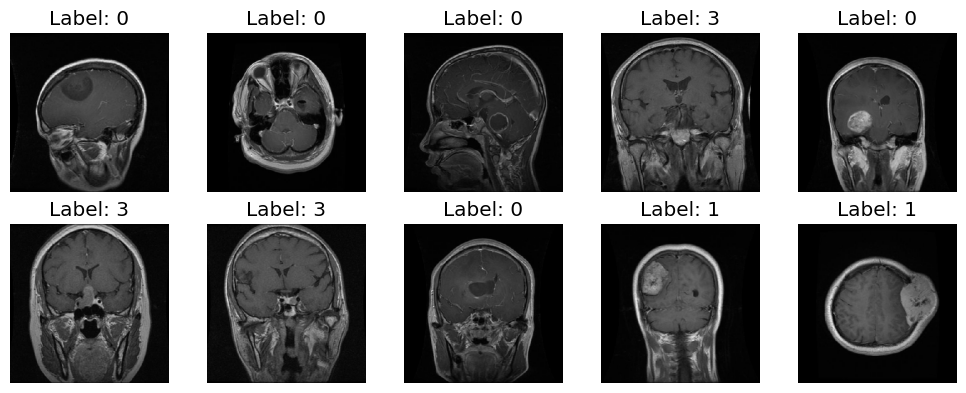

In [ ]:
#Obtenemos batch de imagenes del train data
images_train, labels_train = next(train_data)

#Graficamos las primeras 10 imagenes
plt.figure(figsize=(10, 4))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(images_train[i])
  plt.title(f"Label: {np.argmax(labels_train[i])}")
  plt.axis('off')
plt.tight_layout()
plt.show()

Nota Descripción de Labels:
+ Label 0 - glioma_tumor
+ Label 1 - meningioma_tumor
+ Label 2 - no_tumor
+ Label 3 - pituitary_tumor

In [ ]:
#Obtenemos el directorio de imagenes de train
test_directory = "/content/drive/Shared drives/IA 2 equipo 3/DATOS PROYECTO FINAL/Testing"

#Obtenemos las imagenes para el test
test_data = data_gen.flow_from_directory(
    directory = test_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    seed=seed_value
)

Found 394 images belonging to 4 classes.


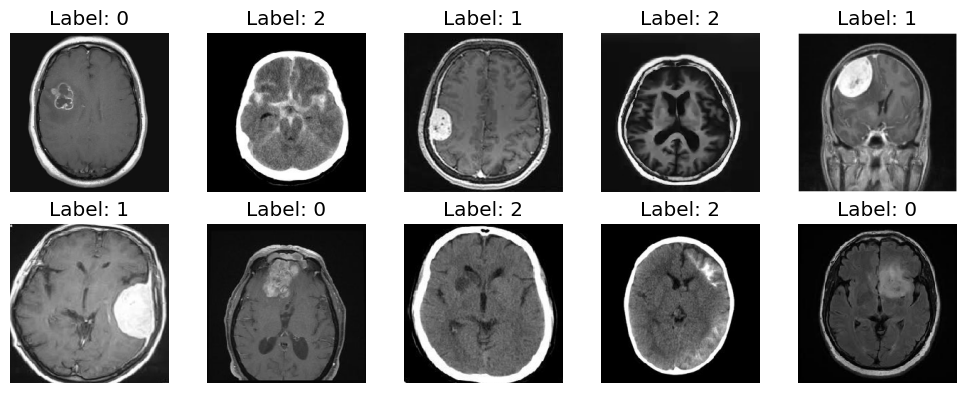

In [ ]:
#Obtenemos batch de imagenes del test data
images_test, labels_test = next(test_data)

#Graficamos las primeras 10 imagenes
plt.figure(figsize=(10, 4))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(images_test[i])
  plt.title(f"Label: {np.argmax(labels_test[i])}")
  plt.axis('off')
plt.tight_layout()
plt.show()

Nota Descripción de Labels:
+ Label 0 - glioma_tumor
+ Label 1 - meningioma_tumor
+ Label 2 - no_tumor
+ Label 3 - pituitary_tumor

<a name="exploratory"></a>
### 2. Exploratory data analysis

In [ ]:
#Imprimimos el tamaño de las imagenes y de sus etiquetas correspondientes de un batch de 32
print(f"Training images shape: {images_train.shape}")
print(f"Training labels shape: {labels_train.shape}")
print(f"Testing images shape: {images_test.shape}")
print(f"Testing labels shape: {labels_test.shape}")

Training images shape: (32, 224, 224, 3)
Training labels shape: (32, 4)
Testing images shape: (32, 224, 224, 3)
Testing labels shape: (32, 4)


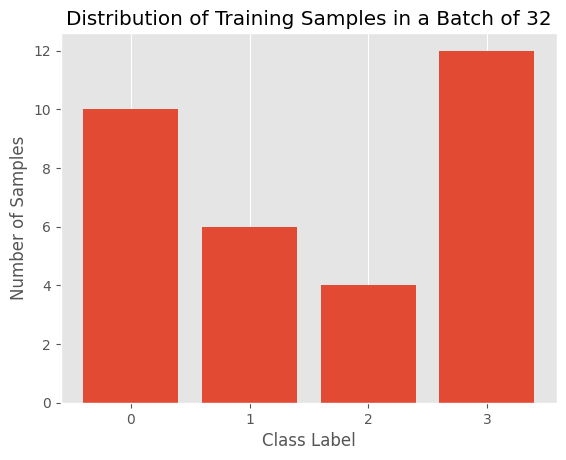

In [ ]:
#Checamos las proporciones de un batch de 32

#Convertimos a un array de numpy
train_labels_flat = np.argmax(labels_train, axis=1)

#Contamos la frecuencia de cada clase
unique, counts = np.unique(train_labels_flat, return_counts=True)

#Graficamos en un bar plot
plt.bar(unique, counts, tick_label=unique)
plt.title('Distribution of Training Samples in a Batch of 32')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.grid(axis='y')
plt.show()

Se puede apreciar que en un batch de 32 imágenes de entrenamiento hay más presencia de la clase 3 (pituitary_tumor) con una frecuencia 12 imágenes, mientras que la clase 0 (glioma_tumor) le sigue con una frecuencia de 10 imágenes, la clase 1 (meningioma_tumor) con 6 imágenes y finalmente la clase 2 (no_tumor) con 4 imágenes. Se puede apreciar que hay un poco de desbalance entre las clases para este batch. A pesar de esto, hay más datos de entrenamiento que sólo 1 batch de 32, por lo que a continuación se exploraráa a profundidad un análisis de la distrubución total de los datos de entrenamiento para observar si se sigue esta distribución un poco desbalanceada o si es otro comportamiento de la distribución de frecuencias entre las 4 clases.

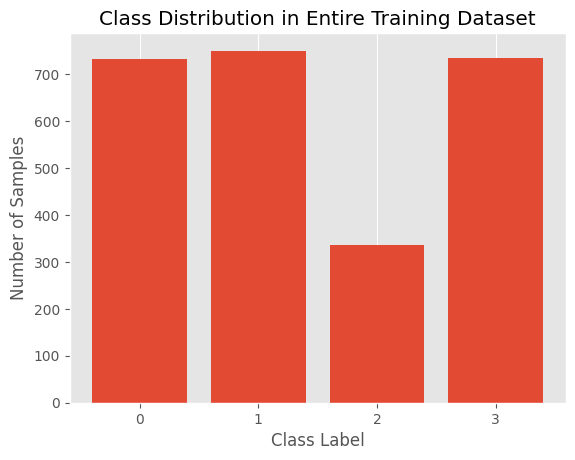

Number of images per class:
Class 0: 733 images
Class 1: 750 images
Class 2: 336 images
Class 3: 734 images
Total images: 2553
Image shape: (224, 224, 3)


In [ ]:
#Analizamos la distribución de todas las imagenes en train
all_images = []
all_labels = []

#Recolectamos de cada batch de datos pertenecientes a train
for images, labels in train_data:
    all_images.append(images)
    all_labels.append(labels)
    #Rompemos para que no haya un loop
    if len(all_images) >= train_data.samples // train_data.batch_size:
        break

#Convertimos las listas en arrays de numpy
all_images = np.concatenate(all_images, axis=0)
all_labels = np.argmax(np.concatenate(all_labels, axis=0), axis=1)

#Contamos frecuencias para cada clase y visualizamos en un gráfico de barra
unique_classes, class_counts = np.unique(all_labels, return_counts=True)
plt.bar(unique_classes, class_counts, tick_label=unique_classes)
plt.title('Class Distribution in Entire Training Dataset')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.grid(axis='y')
plt.show()

#Imprimimos la frecuencia de cada clase
print("Number of images per class:")
for cls, count in zip(unique_classes, class_counts):
    print(f"Class {cls}: {count} images")

#Imprimimos estadística básica del número de imagenes totales de train y su figura
print(f"Total images: {len(all_images)}")
print(f"Image shape: {all_images[0].shape}")

Se puede observar que la distribución es un poco diferente a la distribución de frecuencias de cada clase que tiene un batch de 32 imágenes, pues el desbalance ya no es tan notorio a como se observaba en el batch. En general, la mayoría de las clases positivas con algún tipo de tumor cuenta con una frecuencia arriba de 730 imágenes, siendo la clase 1 de meningioma_tumor más frecuente con 750 imágenes del total para entrenamiento. En cambio, la clase con menor frecuencia para el total de datos de entrenamiento es la clase 3 que pertenece a no_tumor, osea, la clase en caso negativo.

En general, se puede decir que las clases están balanceadas y no habría problemas de desbalance al momento de entrenar el modelo especializado. A pesar de que hay menos cantidad de imágenes para cuando no hay tumor, es más relevante predecir cuando si hay tumores de cualquier tipo para que el modelo aprenda a identificar los casos positivos y prevenir falsos negativos durante las predicciones.

<a name="model-design"></a>
### 3. Model design and development

In [ ]:
# Cargar modelo base VGG16 preentrenado
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_base.trainable = False  # Congelar capas preentrenadas

# Construir modelo personalizado
model = Sequential([
    vgg_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 clases
])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Compilación del modelo
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Entrenamiento
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=10,
    batch_size=32
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


81/81 ━━━━━━━━━━━━━━━━━━━━ 570s 7s/step - accuracy: 0.4837 - loss: 2.3214 - val_accuracy: 0.6842 - val_loss: 0.6979
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 230ms/step - accuracy: 0.7608 - loss: 0.5903 - val_accuracy: 0.7509 - val_loss: 0.6182
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 243ms/step - accuracy: 0.8092 - loss: 0.4680 - val_accuracy: 0.7895 - val_loss: 0.5315
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 231ms/step - accuracy: 0.8464 - loss: 0.4131 - val_accuracy: 0.7895 - val_loss: 0.4477
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 229ms/step - accuracy: 0.8551 - loss: 0.3695 - val_accuracy: 0.8000 - val_loss: 0.4682
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 233ms/step - accuracy: 0.8595 - loss: 0.3625 - val_accuracy: 0.8000 - val_loss: 0.4981
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 231ms/step - accuracy: 0.8688 - loss: 0.2973 - val_accuracy: 0.7895 - val_loss: 0.4423
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 227ms/step - accuracy: 0.8923 - loss: 0.2690 - val_accuracy: 0.8175 

In [ ]:
# Extraer datos del historial de entrenamiento
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc) + 1)

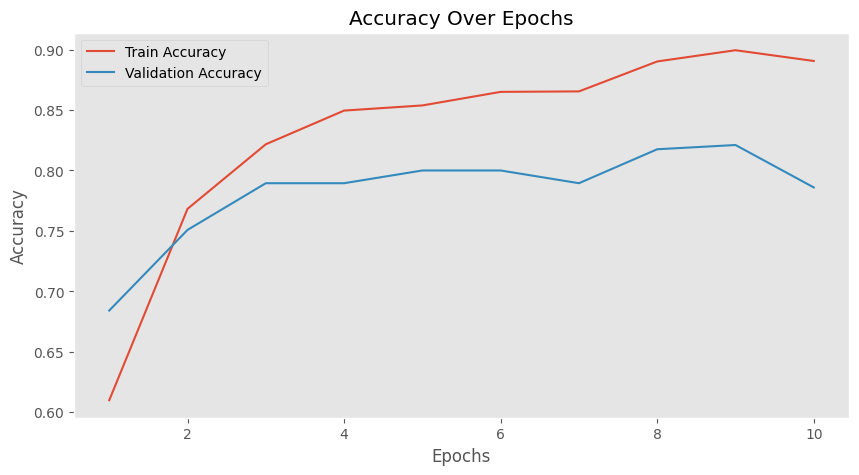

In [ ]:
# Graficar exactitud
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

La gráfica muestra la evolución de la exactitud del modelo durante el entrenamiento y la validación a lo largo de 10 épocas. Se observa un incremento constante en la exactitud del entrenamiento, alcanzando aproximadamente 0.90, mientras que la exactitud de validación se estabiliza cerca de 0.85 después de la cuarta época. Sin embargo, a partir de la época 6, se identifica una brecha que crece entre ambas curvas, indicando posibles signos de sobreajuste, ya que el modelo parece estar memorizando los datos de entrenamiento en lugar de generalizar completamente. A pesar de esto, la exactitud de validación sigue siendo razonablemente alta, lo que sugiere que el modelo tiene un desempeño aceptable en datos no vistos.

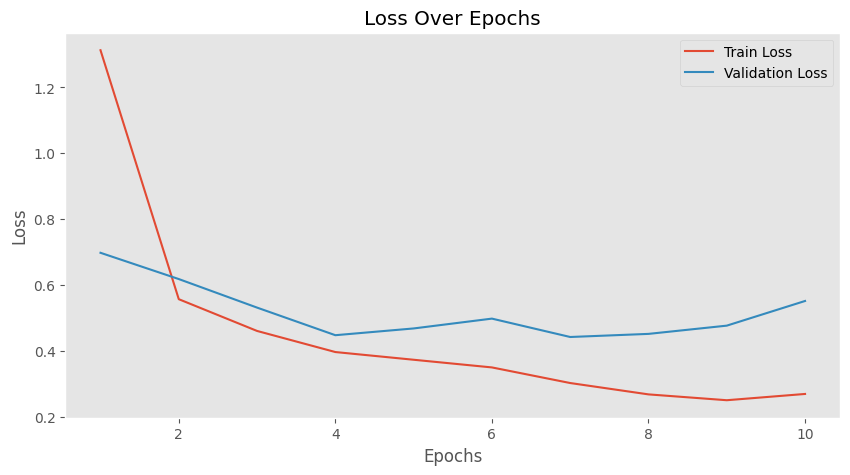

In [ ]:
# Graficar pérdida
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

La gráfica de pérdida muestra cómo el modelo mejora al reducir su error durante el entrenamiento y la validación a lo largo de 10 épocas. Inicialmente, ambas pérdidas son altas, pero disminuyen rápidamente en las primeras épocas. Sin embargo, a partir de la época 6, la pérdida de validación comienza a aumentar ligeramente mientras la de entrenamiento sigue disminuyendo, lo que indica un posible sobreajuste. Esto sugiere que el modelo está memorizando los datos de entrenamiento y perdiendo capacidad para generalizar a datos no vistos, lo cual también se refleja en la gráfica de exactitud. Aunque la exactitud en el conjunto de validación se estabiliza en un nivel razonablemente alto, el aumento en la pérdida de validación indica que el modelo está encontrando más dificultades para hacer predicciones exactas en datos nuevos. Esta combinación de estabilidad en la exactitud y aumento en la pérdida de validación refuerza la necesidad de ajustar el modelo para evitar el sobreajuste y mejorar su capacidad de generalización.

<a name="performance"></a>
### 4. Performance Metrics

In [ ]:
#Evaluamos el modelo con datos del test
test_loss, test_accuracy = model.evaluate(test_data)  # Asegúrate de que test_data esté definido
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Predicciones en conjunto de test
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes

# Métricas y matriz de confusión
report = classification_report(y_true, y_pred_classes, target_names=test_data.class_indices.keys())
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Mostrar reporte
print("Classification Report:\n", report)

13/13 ━━━━━━━━━━━━━━━━━━━━ 153s 13s/step - accuracy: 0.7484 - loss: 1.7024
Test Accuracy: 73.86%
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step
Classification Report:
                   precision    recall  f1-score   support

    glioma_tumor       0.10      0.02      0.03       100
meningioma_tumor       0.25      0.36      0.29       115
        no_tumor       0.23      0.32      0.27       105
 pituitary_tumor       0.15      0.12      0.13        74

        accuracy                           0.22       394
       macro avg       0.18      0.21      0.18       394
    weighted avg       0.19      0.22      0.19       394



El modelo alcanzó una exactitud global de 73.86% en el conjunto de prueba, pero las métricas por clase reflejan un bajo desempeño general. Las clases relacionadas con tumores, como glioma y pituitary, presentan valores muy bajos en precisión y recall, indicando que el modelo tiene dificultades para identificarlas correctamente. Aunque la clase "No Tumor" muestra un desempeño moderado, la discrepancia entre la alta exactitud global y los bajos valores de precisión y F1-score sugiere problemas de generalización y un posible impacto del desbalance en las clases.

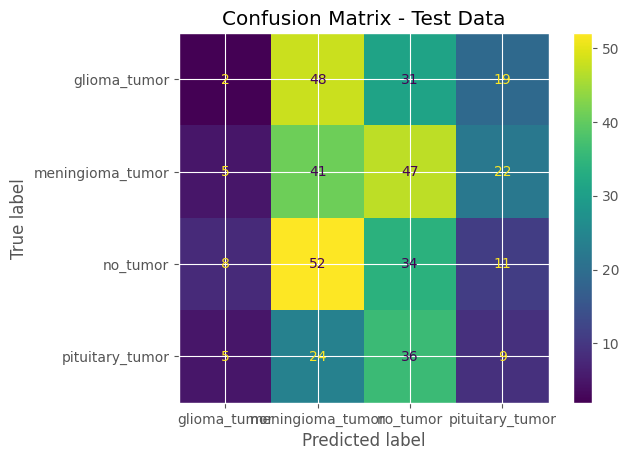

In [ ]:
# Mostrar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=test_data.class_indices.keys())
disp.plot(cmap='viridis')
plt.title("Confusion Matrix - Test Data")
plt.show()

En la matriz de confusión podemos ver que el modelo tiene dificultades para distinguir entre los tipos de tumores, con frecuentes confusiones entre glioma, meningioma y pituitary tumor. Aunque la clase `no_tumor` es la mejor identificada, aún presenta errores. Esto sugiere problemas de diferenciación en las características de las clases y un posible desbalance en los datos.

<a name="conclusions"></a>
## **Personal Conclusions**

**Juan Carlos:** Al concluir este proyecto, logré comprender el proceso completo necesario para aplicar en un entorno real las técnicas de deep learning aprendidas durante el curso. Fue fundamental entender cada paso del diseño, estructura y optimización del modelo, ya que el éxito dependió de saber ajustar parámetros y aplicar técnicas adecuadas para maximizar el desempeño y la eficiencia. También aprendí la importancia de planificar desde el inicio la estructura del modelo final, seleccionar el modelo preentrenado adecuado y analizar las características de la base de datos para anticipar y superar retos, reduciendo errores y tiempos de entrenamiento sin depender de múltiples iteraciones.

Este proyecto reafirmó la importancia de utilizar herramientas de aprendizaje profundo para resolver problemas como la clasificación de tumores cerebrales. Con su implementación adecuada, es posible obtener beneficios significativos: mejor desempeño, optimización del tiempo y recursos computacionales, extracción de patrones complejos y automatización de procesos, incluso con bases de datos limitadas. Además, el uso de modelos preentrenados permite aprovechar características útiles previamente aprendidas, minimizando el error humano.

En conclusión, considero que proyectos como este son esenciales para el avance tecnológico, ya que permiten desarrollar soluciones innovadoras que no solo transforman campos como el diagnóstico médico, sino que también contribuyen a mejorar la calidad de vida de las personas al aplicar la inteligencia artificial a problemas reales y de alto impacto social.


**Leslie López:** Después de haber realizado este proyecto final, me siento mucho más confiada en mis conocimientos y habilidades para desarrollar y comprender modelos de Deep learning y redes convolucionales. Aprendí a cómo preparar imágenes para que puedan entrar a un modelo previamente entrenado y analizar la distribución de las clases para observar si hay un posible riesgo de desbalance de datos al momento de entrenar el modelo nuevo de CNN.

Asimismo, aprendí a poner en práctica cómo implementar la arquitectura del VGG16 para que podamos usar ese modelo completamente como base al hacer freeze a todas sus capas convolucionales y profundas y con base al VGG16 agregarle 1 capa extra de profundidad especializada con los pocos datos de entrenamiento que contamos para nuestro caso de detección de tumores en el cerebro y posteriormente la última capa con 4 nodos para que clasifique si hay tumor o no, y si lo hay, qué tipo de tumor es.

Otra competencia que adquirí gracias a este tipo de proyectos es en pensar en posibles soluciones cuando se presentan obstáculos al momento de entrenar el modelo o cuando observamos que algunas métricas no son del todo buenas. Por ejemplo, en este proyecto vimos que la métrica que más nos importa es el recall, pues para cuestiones médicas como nuestro caso es importante tener muy pocos False Negatives, especialmente para la clase de no_tumor, porque ponemos vidas en riesgo si nos equivocamos en predecir que no tiene un tumor en el cerebro a que si nos equivocamos en decirle que tiene algún tipo de tumor cuando no tiene. Finalmente, en perspectiva, es muy importante esta métrica y en general entrenar muy buenos modelos cuando estos serán utilizados para fines médicos y de diagnóstico.


**Rodrigo Gómez:** Considero que durante este proyecto, nuestro principal enfoque fue mejorar el recall, especialmente porque en el contexto médico es fundamental minimizar los falsos negativos para evitar omitir diagnósticos críticos. Aunque logramos obtener un accuracy decente en general, los valores de recall para dos tipos específicos de tumores fueron significativamente bajos. Este comportamiento evidenció limitaciones en la capacidad del modelo para identificar estas clases correctamente y una tendencia a clasificar muchas instancias como "no tumor", probablemente influenciada por el desbalance de clases en el conjunto de datos.

En nuestro análisis, encontramos un ejemplo interesante en este notebook de Kaggle: https://www.kaggle.com/code/jaykumar1607/brain-tumor-mri-classification-tensorflow-cnn, donde se utilizó EfficientNetB0 para lograr resultados destacables. Sin embargo, decidimos no replicar esa solución directamente, priorizando desarrollar nuestras propias estrategias para aprender de los errores y enfrentarnos al desafío de manera original. Si bien la arquitectura VGG16 fue una elección razonable, identificamos que su capacidad para manejar el desbalance y la complejidad del problema era limitada, lo que reafirmó la necesidad de explorar otros enfoques.

En general, este proyecto me permitió comprender la importancia de analizar cuidadosamente los datos y las métricas antes de diseñar un modelo. Aunque los resultados no fueron óptimos, el proceso fue una experiencia valiosa para fortalecer habilidades técnicas, reflexionar sobre las limitaciones de los enfoques utilizados y desarrollar estrategias más efectivas para problemas complejos y sensibles, como los relacionados con el diagnóstico médico.

**Carlos Sanchez:** En conclusión, con la elaboración de este proyecto, se pudo comprender todo lo que estuvimos viendo en las clases de inteligencia artificial II, en el presente proyecto se habló de la clasificación de tumores y el como utilizar la inteligencia artificial puede minimizar el error humano y mejorar considerablemente un diagnóstico médico.

Por otra, parte la verdad es una clase con temas que como ingeniero industrial no ves a menudo o simplemente no se ven en la carrera, pero en mi experiencia personal trabajando en la industria, si hay ocasiones donde escucho hablar acerca del Deep learning o machine learning y traer las bases bien establecidas o por lo menos tener una noción del detrás de la inteligencia artificial es de suma importancia, este conocimiento te da una cierta ventaja entre los demás, debido a que es una gran innovación y muchas empresas quieren empezar a implementarlo.


<a name="references"></a>
## **References**

+ Liu, J., Li, M., Wang, J., Wu, F., Liu, T., & Pan, Y. (2014). A survey of MRI-based brain tumor segmentation methods. Tsinghua science and technology, 19(6), 578-595.


+ Mayo Clinic (2023). Tumor cerebral. *Síntomas y causas.* Recuperado de https://www.mayoclinic.org/es/diseases-conditions/brain-tumor/symptoms-causes/syc-20350084

+ Sartaj B. (2019). Brain Tumor Classification (MRI). *Classify MRI images into four classes.* Recuperado de https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri?resource=download


**Firma de Honor:** "Nosotros damos nuestra palabra de que hemos realizado este proyecto final con integridad académica"